Die Datei "Sozialscore_Teilhabe.xlsx" enthält Daten aus den bereits analysierten Files, die wir aus den Analysen händisch zusammengetragen haben. Damit führen wir eine Clusteranalyse durch, um "ähnliche" Stadtbezirke zu charakterisieren.



**Spaltendefinitionen:** 

**Sum_2014_bis_2027** = Summe aller Werte (Summe aller Prozentwerte, aller Sozialindikatoren) pro Bezirk aus der Analyse "Sozialstrukturanalyse.ipynb". Das sind die aggregierten Werte für unsere Definition niedriger sozialer Score/Index (hohe Zahlen), hoher sozialer Score/Index (niedrige Zahlen).

**Arbeitslosenquote_2014_Minus_2022** = Differenz der Arbeitslosenquote 2014-2022 (z. B. -1.27 heißt, dass die Arbeitslosenquote von 2014 auf 2022 um 1.27% gesunken ist). Diese Werte gehen auch aus der Analyse "Sozialstrukturanalyse.ipynb" hervor.

**Wahlbeteiligung_EW24** = Wahlbeteiligung Europawahl 2024, Werte sind aus der "Wahlenbeteiligungsanalyse.ipynb"


<br>
<bR>

**Annahmen:**
1.Da das Wahlverhalten/die Prozentzahlen der die anderen Wahlen für die Bezirke prozentual ähnlich sind reicht es, sich nur die Europawahl anzugucken. <br>
2.Da der Korrelationskoeffizient zwischen Arbeitslosenquote und Migration bei ca 0.8 liegt, betrachten wir nur die Arbeitslosenquote.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel("Dateien/Sozialscore_Teilhabe.xlsx") 
df.head()

,Raum,Bezirk,Sum_2014_bis_2017,Wahlbeteiligung_EW24,Arbeitslosenquote_2014_Minus_2022
0,Hiltrup,Amelsbüren,1639.40,68.650683,0.87
1,Hiltrup,Berg Fidel,3869.93,64.827307,-0.06
2,Hiltrup,Hiltrup-Ost,1363.08,71.482590,0.24
3,Hiltrup,Hiltrup-Mitte,2073.74,67.449222,-0.22
4,Nord,Coerde,4076.59,50.339170,-1.27


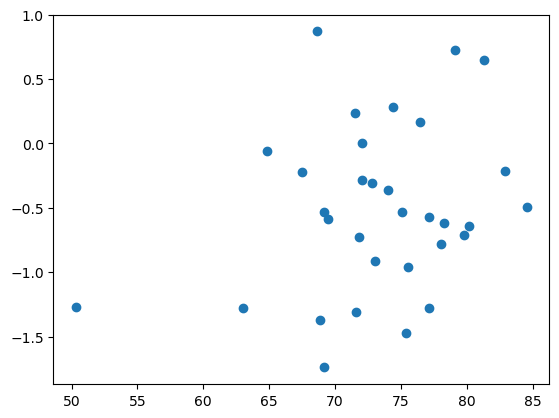

,Sum_2014_bis_2017,Wahlbeteiligung_EW24,Arbeitslosenquote_2014_Minus_2022
0,1639.40,68.650683,0.87
1,3869.93,64.827307,-0.06
2,1363.08,71.482590,0.24
3,2073.74,67.449222,-0.22
4,4076.59,50.339170,-1.27


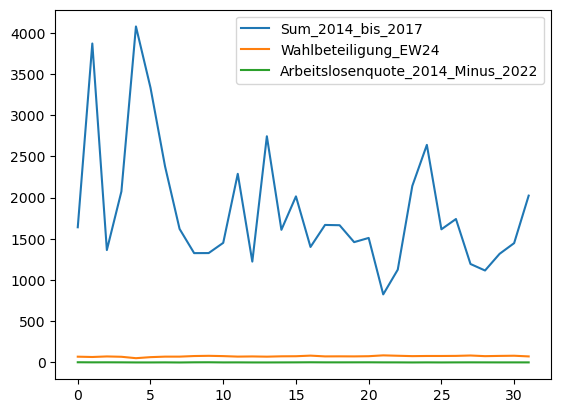

In [60]:
plt.scatter(df["Wahlbeteiligung_EW24"], df["Arbeitslosenquote_2014_Minus_2022"])
plt.show() #Zusammenhänge nicht erkennbar, da Plot sehr zerstreut

X = df[['Sum_2014_bis_2017', 'Wahlbeteiligung_EW24', 'Arbeitslosenquote_2014_Minus_2022']]
X.plot() #Plot der Werte für X
X.head()

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
#X_transformed #X.shape[0]=len(X_transformed)

In [62]:
model = KMeans(n_clusters = 4) #auch n=2,3,5 etc ausprobieren und Ergebnisse (result_df) ansehen
model.fit(X_transformed)

df['Cluster'] = model.predict(X_transformed)
result_df=df.sort_values("Cluster")
result_df

C:\Users\SaG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SaG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Raum,Bezirk,Sum_2014_bis_2017,Wahlbeteiligung_EW24,Arbeitslosenquote_2014_Minus_2022,Cluster
1,Hiltrup,Berg Fidel,3869.93,64.827307,-0.06,0
4,Nord,Coerde,4076.59,50.339170,-1.27,0
5,Nord,Kinderhaus-West,3333.36,63.022830,-1.28,0
15,West,Gievenbeck,2014.32,74.002100,-0.36,1
25,Mitte,Geist,1614.78,77.141422,-1.28,1
24,Mitte,Pluggendorf/Bahnhof,2639.41,77.141422,-0.57,1
23,Mitte,Schützenhof/Hafen,2140.92,75.349240,-1.47,1
18,West,Albachten,1664.32,72.784100,-0.31,1
17,West,Roxel,1667.65,72.017066,-0.28,1
14,Suedost,Wolbeck,1608.58,73.050805,-0.91,1


In [63]:
result_df.groupby("Cluster").mean()

C:\Users\SaG\AppData\Local\Temp\ipykernel_17320\2506793552.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_df.groupby("Cluster").mean()


,Sum_2014_bis_2017,Wahlbeteiligung_EW24,Arbeitslosenquote_2014_Minus_2022
Cluster,,,
0,3759.960000,59.396436,-0.870000
1,1943.380000,72.304542,-0.842000
2,1251.648571,79.811586,-0.568571
3,1431.937143,74.784838,0.420000


**Interpretation der Ergebnisse result_df.groupby("Cluster").mean() **:

Cluster 0: Höherer sozialer Score/Index, höhere Wahlbeteiligung, Rückgang der Arbeitslosenquote. Diese Bezirke sind wahrscheinlich (sozial) stabil.

Cluster 2: Niedriger sozialer Score/Index (hoher Wert für Sum_2014_bis_2017), niedrige Wahlbeteiligung, Rückgang der Arbeitslosenquote. Die Stadtbezirke (zB CoerdeI in den Clustern haben ggf ein paar soziale Challanges und benötigen Aufmerksamkeit von der Politik.

Cluster 1: Höherer sozialer Score/Index, höhere Wahlbeteiligung, Zunahme der Arbeitslosenquote. Liegt Eventuell auch daran dass die Bezirke z. T. an Bezirke aus Cluster 1, oder generell weiter außerhalb in Münster liegen (und Wohnraum da vielleicht noch bezahlbarer ist). 

Cluster 3: Ähnlich wie Cluster 0. Man kann auch Cluster 0 und 3 zusammenfassen (bzw model = KMeans(n_clusters = 3) wählen).
